## Index:

1. Selecting best-fit model with appropriate k value
2. Hold Out Validation
3. K-Fold cross validation



To select the Best-fit model, we want to understand how under and overfitting works?

In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_cleaned.csv')

Segregate data between dependent and independent variables

In [3]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

Now, we need to scale the data so that everything is in same measurement. Scaling the data will bring everything from -1 to 1

In [14]:
X_columns = data.drop(['Survived'], axis=1).columns
X_columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [5]:
#now, scale the data in independet variables.
#Before:
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
#apply scaling.
X = ss.fit_transform(X)

#convert the array back to DF
X = pd.DataFrame(X, columns=X_columns)

In [16]:
#after
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
1,0.638789,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803
2,-0.284663,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
3,0.407926,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
4,0.407926,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838


In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=2, stratify=y)

## Implement KNN

In [18]:
#import knn classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

In [19]:
clf = knn(n_neighbors=1)

clf.fit(train_X, train_y)

#training score
train_predict = clf.predict(train_X)
k1 = f1_score(train_predict, train_y)
print('Training prediction ', k1)

#test Score
test_predict = clf.predict(test_X)
k2 = f1_score(test_predict, test_y)
print('Test prediction ', k2)




Training prediction  0.9824561403508771
Test prediction  0.6976744186046512


In [20]:
clf = knn(n_neighbors=3)

clf.fit(train_X, train_y)

#training score
train_predict = clf.predict(train_X)
k1 = f1_score(train_predict, train_y)
print('Training prediction ', k1)

#test Score
test_predict = clf.predict(test_X)
k2 = f1_score(test_predict, test_y)
print('Test prediction ', k2)




Training prediction  0.8121212121212122
Test prediction  0.7185628742514969


In [27]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = knn(n_neighbors = i)
        clf.fit(train_X, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_X)
        tmp = f1_score(tmp,train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_X)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [28]:
k = range(1, 150)


In [29]:
train_f1, test_f1 = F1score(k)

In [30]:
score = pd.DataFrame({'train_scores':train_f1, 'test_scores':test_f1}, index=k)
# we will create a plot to understand it better

## Visualization

(0.4, 1.0)

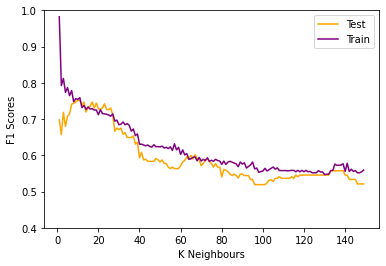

In [36]:
plt.plot(k, test_f1, color="orange", label="Test")
plt.plot(k, train_f1, color="purple", label="Train")
plt.xlabel("K Neighbours")
plt.ylabel("F1 Scores")
plt.legend()
plt.ylim(0.4, 1)

### Insights

We notice the following here:

1. Region before k=7 is called **"Over-fitting"**. Here, the model is very accurate on training data but performs poorly on training data

2. Region between k=8 rill k=23 is called **'Best-fit'**. It is because performance on both trainig and test data is similar

3. Region after k=24 is called **"Underfit"**. Here, the model performs poorly on both Train data and test data

In [46]:
#Checking how the region between best-fit looks like
k2 = range(5, 30)

In [43]:
train2_f1, test2_f1 = F1score(k2)

In [44]:
score = pd.DataFrame({'train_scores':train2_f1, 'test_scores':test2_f1}, index=k2)

(0.4, 1.0)

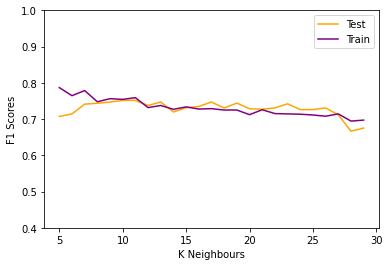

In [45]:
plt.plot(k2, test2_f1, color="orange", label="Test")
plt.plot(k2, train2_f1, color="purple", label="Train")
plt.xlabel("K Neighbours")
plt.ylabel("F1 Scores")
plt.legend()
plt.ylim(0.4, 1)

This is not the most accurate way of testing the model. Here, as we are using "Test_data" to test the model, the test data is no longer "unseen" data. So, our model can now overfit on test data as well.

To tackle this, we actually divide the data into 3 parts - Train (70%), Validation(15%), Test (15%)



In [51]:
#To check if test data has been seen by the model and if it is impacting the model? We do this by creating the test and train split again. Ideally, model should behave the same way
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=212, stratify=y)


In [52]:
k = range(1, 150)
train_f1, test_f1 = F1score(k)

(0.4, 1.0)

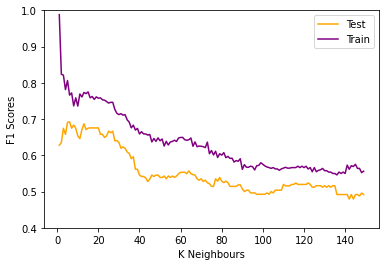

In [53]:
plt.plot(k, test_f1, color="orange", label="Test")
plt.plot(k, train_f1, color="purple", label="Train")
plt.xlabel("K Neighbours")
plt.ylabel("F1 Scores")
plt.legend()
plt.ylim(0.4, 1)

As you can see, the two models are quite different from each other.
Now, lets find out the way to ensure that this issue is resolved

## Hold Out Validation

Divide the data into 3 parts - Train (70%), Validation(15%), Test (15%)

Here, Validation set is use to tune the model or to select value of k. The test data is completely unseen value for the model which will be used only at the end.

### Possible issues:
- The Train and Validation set might have different distribution. So, we need to create a stratified hold-out set
- It requires a chunk of data to be put aside. Can be an issue when we have a small dataset or when we need more data to create complex model

In [6]:
#Repeat old steps of seperating out dependednt and independt features
data_ho = pd.read_csv('data_cleaned.csv')


In [20]:
X_ho = data_ho.drop(['Survived'], axis=1)
y_ho = data_ho['Survived']

y_ho.shape

(891,)

In [31]:
#create validation and test set. We have to run test_train_split twice

from sklearn.model_selection import train_test_split 
trainho2_X, testho_X, trainho2_y, testho_y = train_test_split(X_ho, y_ho, test_size=0.2, random_state=23, stratify=y_ho)

In [32]:
trainho2_y.shape, trainho2_X.shape

((712,), (712, 24))

In [33]:
#now, use trainho2_X and trainho2_y to split the data again as train and validation data

trainho_X,valho_X,trainho_y,valho_y = train_test_split(trainho2_X, trainho2_y, test_size=0.2, random_state=42, stratify=trainho2_y)

Check the distribution of target class in train, test and validation dataset

We want the distribution of target variable to be same in case of train, test nad validation dataset. So, update the stratify from y to target dataset. This is called **Stratified Holdout Validation**


In [34]:
trainho_y.value_counts()/len(trainho_y)

0    0.616872
1    0.383128
Name: Survived, dtype: float64

In [35]:
valho_y.value_counts()/len(valho_y)

0    0.615385
1    0.384615
Name: Survived, dtype: float64

In [36]:
testho_y.value_counts()/len(testho_y)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

## K-fold Cross Validation

K-fold model:

1. Shuffle the dataset randomly
2. Split the dataset into k groups
3. Pick a group as a holdout
4. Take the remaining groups as training and fit a model
5. Predict and evaluate on the holdout
6. Repeat the procedure with every group

Advantages:

1. Prevent Overfitting
2. Consistent model as model is evalueated on multiple validation sets and not just 1

How to decide value of K:

1. Generally: 5 < k < 10. 10-20 folds are usually considered good enough.
2. Validation set should be statistically signifincant

- when k=2, it will be 50-50 split and bias will be high
- k > 10, more data for training but model can get too complicated
- k = number of observation, extreme case -> This is also called leave one out 

### Leave one out Cross Validation:
- N instances, n model
- Not signifincant when data is large
- Best practiced for small fataset


In [37]:
data = pd.read_csv('data_cleaned.csv')

In [38]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [44]:
X_columns = data.drop(['Survived'], axis=1).columns

In [43]:
#apply scaling.
X = ss.fit_transform(X)

#convert the array back to DF
X = pd.DataFrame(X, columns=X_columns)

In [45]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=2, stratify=y)

In [46]:
#import knn classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as knn

### Checking consistency using Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn(n_neighbors=3), X=train_X, y=train_y, cv=10)
score

array([0.76119403, 0.74626866, 0.8358209 , 0.73134328, 0.85074627,
       0.71641791, 0.76119403, 0.80597015, 0.81818182, 0.77272727])

This cross val score will return an array of 10 values (as cv=10) will consist the validation score for the 10 folds. This list itself is not used but we will take its mean to understand how well the model is preforming. Also, to check consistency, the model should not vary too much. So, we also caluclate standar deviation

In [52]:
score.mean()*100, score.std()*100

(77.99864314789689, 4.3083045655178545)

### Automating the process of cross validation for differnt neighbours

In [55]:
def Val_score(n_neighbours):
    avg = []
    std = []

    for i in n_neighbours:
        score = cross_val_score(knn(n_neighbors=i), X=train_X, y=train_y, cv=10)
        avg.append(score.mean()*100)
        std.append(score.std()*100)
    return avg, std 

In [57]:
n_neighbours = range(1,50)
avg, std = Val_score(n_neighbours)

Plotting Mean validation score for each k-fold

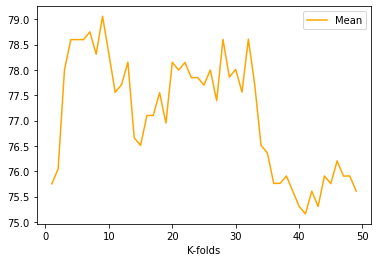

In [61]:
plt.plot(n_neighbours, avg, label="Mean", color="orange")
#plt.plot(n_neighbours, std, label="Standard Deviation", color="purple")
plt.xlabel("K-folds")
plt.legend()
plt.show()

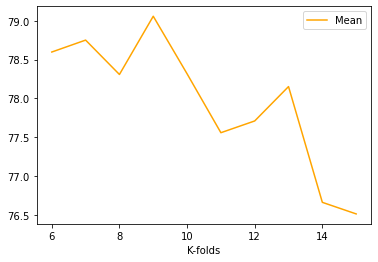

In [64]:
#We can see that max value is between 5 and 15, so lets look at it closely
plt.plot(n_neighbours[5:15], avg[5:15], label="Mean", color="orange")
plt.xlabel("K-folds")
plt.legend()
plt.show()

Max value is at 9

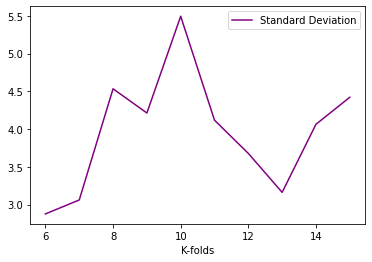

In [65]:
#Standard deviation plot from 5 to 15 
#plt.plot(n_neighbours, avg, label="Mean", color="orange")
plt.plot(n_neighbours[5:15], std[5:15], label="Standard Deviation", color="purple")
plt.xlabel("K-folds")
plt.legend()
plt.show()

Here, the standard deviation is low which means that model has generalized pretty well

In [72]:
#now, trying optimum model on test set

clf = knn(n_neighbors = 9)
clf.fit(train_X, train_y)

score1 = clf.score(train_X, train_y)
score = clf.score(test_X, test_y)
score, score1

#As we can see, the scores are pretty good and close

(0.8116591928251121, 0.8263473053892215)